In [124]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import operator

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from scipy.integrate import quad
from scipy import stats

from itertools import permutations
import math

from sklearn.datasets import load_iris
import numpy as np
import random as rd
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

from sympy import Symbol,diff,exp

# Probability and stats

Permutations and combinations

In [2]:
def permute(object):
    string = str(object)
    perm_set = []
    perm_repeated = permutations(string)
    perm_list = [''.join(p) for p in permutations(string)]
    for item in perm_list:
        if item not in perm_set:
            perm_set.append(item)
    return perm_set

def subset(string): #returns all subsets of a string (eg. abc - a, b, c, ab ...)
    if len(string) == 0:
        return ['']
    else:
        return subset(string[1:]) + [string[0] + x for x in subset(string[1:])]

def combinations(string,k): #subset combinations of length k (nCk)
    if k == 0:
        return ['']
    elif len(string) < k:
        return ''
    elif k == len(string):
        return [string]
    else:
        combos_wo_first = combinations(string[1:],k)
        intermediate = combinations(string[1:], k-1)
        combos_w_first = [string[0] + i for i in intermediate]
        return combos_wo_first + combos_w_first

In [3]:
#permute('221')
#subset('string')
#combinations('123',2)

# Matrices

Matrix information: shape, rank, determinant, transpose, inverse, linear dependence

In [167]:
matrix = np.matrix([[3,2,1],[-1,4,2],[5,6,3]])
#matrix = matrix@matrix.T

print(f'Shape is {matrix.shape}')
print(f'Rank is {np.linalg.matrix_rank(matrix)}')
print(f'Linear independence: {np.linalg.matrix_rank(matrix) == matrix.shape[0]}')
print(f'Transpose is')
print(f'{matrix.getT()}')

if matrix.shape[0] ==matrix.shape[1] and round(np.linalg.det(matrix),6) != 0:
    print(f'Determinant is {np.linalg.det(matrix)}')
    print('Inverse is')
    print(f'{matrix.getI()}')
else:
    print('Not invertible')


Shape is (3, 3)
Rank is 2
Linear independence: False
Transpose is
[[ 3 -1  5]
 [ 2  4  6]
 [ 1  2  3]]
Not invertible


Matrix addition/subtraction and multiplication

In [5]:
matrix1 = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
matrix2 = np.matrix([[1,2,3],[4,5,6],[7,8,9]])

print(matrix1 + matrix2)



[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [152]:
matrix1 = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
matrix2 = np.matrix([[1,2,3],[4,5,6],[7,8,9]])

if matrix1.shape[1] == matrix2.shape[0]:
    print(matrix1 * matrix2)
else:
    print('Dimensions not aligned')

[[ 30  36  42]
 [ 66  81  96]
 [102 126 150]]


In [159]:
A = np.array([[1,2,3],[2,1,3]])

AAT = A@A.T
invAAT = np.linalg.inv(AAT)
(A.T)@invAAT

ATA = A.T@A
invATA = np.linalg.inv(ATA)

LinAlgError: Singular matrix

In [189]:
a,b,c,d = 3,3,3,4

int((7 + 4*a + 3*b + 2*c)%9) == int(d)

False

# Solving matrices

In [7]:
def under_det_system_dual(X,Y, norm_multiplier):
    lambdaI = np.identity(len(X)) * norm_multiplier
    print('XT is')
    print(f'{X.T}')
    print('XXT is')
    print(f'{X@X.T}')
    print('XXT + lambdaI is')
    print(f'{X@X.T + lambdaI}')
    print('inv(XXT + lambdaI) is')
    print(f'{np.linalg.inv(X@X.T + lambdaI)}')
    print('XT.inv(XXT + lambdaI) is')
    print(f'{(X.T)@(np.linalg.inv(X@X.T + lambdaI))}')
    return (X.T)@(np.linalg.inv(X@X.T + lambdaI))@Y

def even_det_system(X,Y):
    if (X.shape[0] == X.shape[1]) and (round(np.linalg.det(X),6) != 0):
        print('invX is')
        print(f'{np.linalg.inv(X)}')
        return np.linalg.inv(X)@Y
    else:
        return 'No solution'
    
def over_det_system_primal(X,Y,norm_multiplier):
    lambdaI = np.identity(X[0].size) * norm_multiplier
    print('XT is')
    print(f'{X.T}')
    print('XTX is')
    print(f'{X.T@X}')
    print('XTX + lambdaI is')
    print(f'{X.T@X + lambdaI}')
    print('inv(XTX + lambdaI is')
    print(f'{np.linalg.inv(X.T@X + lambdaI)}')
    print('inv(XTX + lambdaI).XT is')
    print(f'{np.linalg.inv(X.T@X + lambdaI)@X.T}')
    return ((np.linalg.inv(X.T@X + lambdaI))@X.T)@Y

def poly_reg_coeffmatrix_ridge(X,Y,degree,norm_multiplier,bias):
    X = PolynomialFeatures(degree = degree).fit_transform(X) #creates matrix with bias and product terms
    if not bias:
        X = np.delete(X,[0],1)
    if X[0].size == len(X):
        print('System type: even determined system')
        return even_det_system(X,Y)
    elif X[0].size > len(X): #more unknowns than equations
        print('System type: underdetermined system')
        return under_det_system_dual(X,Y,norm_multiplier)
    else: 
        print('System type: overdetermined system')
        return over_det_system_primal(X,Y,norm_multiplier)

In [151]:
X = np.array([[1,2,3],[2,1,3]])
Y = np.array([[1],[1]])

#even_det_system(X,Y)
#under_det_system_dual(X_poly,Y, norm_multiplier)
#over_det_system_primal(X,Y,0)

#poly_reg_coeffmatrix_ridge(X,Y, degree = 1, norm_multiplier = 0, bias = False)


XT is
[[1 2]
 [2 1]
 [3 3]]
XTX is
[[ 5  4  9]
 [ 4  5  9]
 [ 9  9 18]]
XTX + lambdaI is
[[ 5.  4.  9.]
 [ 4.  5.  9.]
 [ 9.  9. 18.]]
inv(XTX + lambdaI is


LinAlgError: Singular matrix

# Gradient descent

Non-linear functions

In [9]:
#exponential function
def exp(x,y,w):
    def f(x,w):
        return np.exp(-x@w)
    y_pred = f(x,w)
    cost = np.sum((y_pred - y)*(y_pred - y))
    grad = (-2 * ((y_pred - y) * y_pred).T @ x).T
    return y_pred, cost, grad

#sigmoid function
def sigmoid(x,y,w):
    def f(x,w):
        return np.array(1/(1+np.exp(-x@w)))
    y_pred = f(x,w)
    cost = np.sum((y_pred - y)*(y_pred - y))
    grad = (-2 * ((y_pred - y) * y_pred * (1-y_pred)).T @ x).T
    return y_pred, cost, grad

#ReLu function
def relu(x,y,w):
    def f(x,w):
        return np.array(np.maximum(x@w, 0))
    y_pred = f(x,w)
    cost = np.sum((y_pred - y)*(y_pred - y).T)
    grad = -2 * ((y_pred - y) * y_pred)
    return y_pred, cost, grad

#polynomial function
def poly(x,y,w):
    def f(x,w):
        return np.array(x@w)
    y_pred = f(x,w)
    cost = np.sum((y_pred - y)*(y_pred - y))
    grad = (-2 * ((y_pred - y)).T @ x).T
    return y_pred, cost, grad


In [10]:
X = np.array([[1,1],[1,1]])
Y = np.array([[1],[1]])
w = np.array([[1],[1]])

#X = PolynomialFeatures(degree = 3).fit_transform(X) #polynomial transform

#y_pred, cost, grad = exp(X,Y,w)
#y_pred, cost, grad = sigmoid(X,Y,w)
#y_pred, cost, grad = relu(X,Y,w)
#y_pred, cost, grad = poly(X,Y,w)

print('y_pred:')
print(np.array(y_pred))

print('cost:')
print(cost)

print('grad:')
print(grad)

y_pred:


NameError: name 'y_pred' is not defined

In [166]:
X = np.array([[0,2],[0,0],[-1,1],[1,1]])
Y = np.array([[1],[1],[2],[2]])
w = np.array([[1],[1]])

X = PolynomialFeatures(degree = 2).fit_transform(X) #polynomial transform

print(X)
print(Y)

[[ 1.  0.  2.  0.  0.  4.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 1. -1.  1.  1. -1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]
[[1]
 [1]
 [2]
 [2]]


Gradient descent

In [11]:
def grad_desc(x_train,y_train,learning_rate,iterations, function):
    #costs = []
    w = np.array([[0], [0]]) #np.random.rand(x_train.shape[1],y_train.shape[1])
    
    #iterations
    for i in range(iterations):
        y_pred, cost, grad = function(x_train,y_train,w)
        w = w - learning_rate*grad
        #costs.append(cost)
    return w#, costs

In [12]:
X = np.array([[1,1],[1,1]])
Y = np.array([[1],[1]])
w = np.array([[1],[1]])

learning_rate = 1e-2
iterations = 100
    
w = grad_desc(X,Y,learning_rate,iterations, relu)
print(w)

[[0.]
 [0.]]


Differentiation

In [2]:
from sympy import Symbol,diff,exp, log, sin

x = Symbol("x")

def poly(x):
    return x**4

def sigmoid(x):
    return 1/(1+exp(-x))

def exp_fn(x):
    return exp(-x)

def softmax(x):
    return log(1+exp(x))

def function(x):
    return (sin(exp(x)))**2


In [215]:
sigmoid(10)

1/(exp(-10) + 1)

In [3]:
learning_rate = 0.2
func = function(x)

gradient = diff(func)
updated_x = x - learning_rate*gradient

#updated_x.subs(x,1)
#gradient.subs(x,1)
#updated_x
gradient

2*exp(x)*sin(exp(x))*cos(exp(x))

# Regression

In [175]:
def regression(x_train,y_train,degree, norm_multiplier, bias, x_test, y_test, function, learning_rate, iterations):
    
    #training and predicting
    if function == 'poly':
        w = poly_reg_coeffmatrix_ridge(x_train,y_train, degree, norm_multiplier, bias)
        x_train_poly, x_test_poly =  PolynomialFeatures(degree = degree).fit_transform(x_train), PolynomialFeatures(degree = degree).fit_transform(x_test)
        if not bias:
            x_test_poly = np.delete(x_test_poly,[0],1)
            x_train_poly = np.delete(x_train_poly,[0],1)
        y_pred, y_train_pred = x_test_poly@w, x_train_poly@w
        
    elif function == 'sigmoid': 
        w = grad_desc(x_train,y_train,learning_rate,iterations, sigmoid)
        y_pred, y_train_pred = np.array(1/(1+np.exp(-x_test@w))), np.array(1/(1+np.exp(-x_train@w)))
        
    elif function == 'relu':
        w = grad_desc(x_train,y_train,learning_rate,iterations, relu)
        y_pred, y_train_pred = np.array(np.maximum(x_test@w, 0)), np.array(np.maximum(x_train@w, 0))
        
    elif function == 'exp':
        w = grad_desc(x_train,y_train,learning_rate,iterations, exp)
        y_pred, y_train_pred = np.array(np.exp(-x_test@w)), np.array(np.exp(-x_train@w))
        
    #evaluation
    train_mse, test_mse = mean_squared_error(y_train,y_train_pred), mean_squared_error(y_test,y_pred)
    train_mae, test_mae = mean_absolute_error(y_train,y_train_pred), mean_squared_error(y_test,y_pred)
    
    print(f'w is: {w}')
    
    print(f'Train prediction: {y_train_pred}')
    print(f'Test prediction: {y_pred}')
    
    print('Model evaluation')
    print(f'train mse: {train_mse}')
    print(f'test mse: {test_mse}')
    
    return w, y_train_pred, y_pred, train_mse, test_mse

In [172]:
x_train = np.array([[1,2],[0,6],[1,0],[0,5],[1,7]])
y_train = np.array([[1],[2],[3],[4],[5]])

x_test = np.array([[1,3]])
y_test = np.array([[1]])

regression(x_train = x_train,y_train = y_train,degree = 1, norm_multiplier = 0.5, bias = True, x_test = x_test, y_test = y_test, function = 'poly', learning_rate = 0.03, iterations = 1000)

System type: overdetermined system
XT is
[[1. 1. 1. 1. 1.]
 [1. 0. 1. 0. 1.]
 [2. 6. 0. 5. 7.]]
XTX is
[[  5.   3.  20.]
 [  3.   3.   9.]
 [ 20.   9. 114.]]
XTX + lambdaI is
[[  5.5   3.   20. ]
 [  3.    3.5   9. ]
 [ 20.    9.  114.5]]
inv(XTX + lambdaI is
[[ 0.78346095 -0.40061256 -0.10535988]
 [-0.40061256  0.56294028  0.02572741]
 [-0.10535988  0.02572741  0.02511485]]
inv(XTX + lambdaI).XT is
[[ 0.17212864  0.15130168  0.38284839  0.25666156 -0.35467075]
 [ 0.21378254 -0.24624809  0.16232772 -0.2719755   0.3424196 ]
 [-0.02940276  0.04532925 -0.07963247  0.0202144   0.09617152]]
w is: [[0.87656968]
 [0.83246554]
 [0.38407351]]
Train prediction: [[2.47718224]
 [3.18101072]
 [1.70903522]
 [2.79693721]
 [4.39754977]]
Test prediction: [[2.86125574]]
Model evaluation
train mse: 1.410750017002455
test mse: 3.4642729398300762


System type: overdetermined system
XT is
[[  1.   1.   1.   1.   1.   1.]
 [-10.  -8.  -3.  -1.   2.   7.]
 [100.  64.   9.   1.   4.  49.]]
XTX is
[[ 6.0000e+00 -1.3000e+01  2.2700e+02]
 [-1.3000e+01  2.2700e+02 -1.1890e+03]
 [ 2.2700e+02 -1.1890e+03  1.6595e+04]]
XTX + lambdaI is
[[ 7.0000e+00 -1.3000e+01  2.2700e+02]
 [-1.3000e+01  2.2800e+02 -1.1890e+03]
 [ 2.2700e+02 -1.1890e+03  1.6596e+04]]
inv(XTX + lambdaI is
[[ 2.61743302e-01 -5.98046826e-03 -4.00858678e-03]
 [-5.98046826e-03  7.13868359e-03  5.93243015e-04]
 [-4.00858678e-03  5.93243015e-04  1.57587078e-04]]
inv(XTX + lambdaI).XT is
[[-0.07931069  0.05303749  0.24360743  0.26371518  0.23374802  0.02345927]
 [-0.018043   -0.02512238 -0.02205733 -0.01252591  0.01066987  0.07305922]
 [ 0.00581769  0.00133104 -0.00437003 -0.00444424 -0.00219175  0.00786588]]
w is: [[0.01220454]
 [0.0856684 ]
 [0.04986016]]
Train prediction: [[ 4.14153704]
 [ 2.5179079 ]
 [ 0.20394082]
 [-0.0236037 ]
 [ 0.38298199]
 [ 3.05503141]]
Test prediction

1

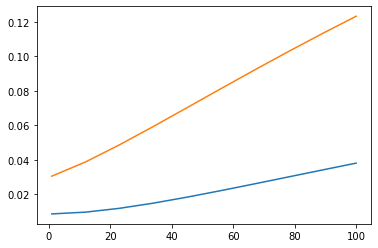

In [193]:
x_train = np.array([[-10],[-8],[-3],[-1],[2],[7]])
y_train = np.array([[4.19],[2.42],[0.22],[0.12],[0.25], [3.09]])

x_test = np.array([[-9],[-7],[-5],[-4],[-2],[1],[4],[5],[6],[9]])
y_test = np.array([[3],[1.81],[0.80],[0.25],[-0.19],[0.4],[1.24],[1.68],[2.32],[5.05]])

degrees = 2
norm_multiplier = 100

#selecting optimal model
train_mse_list, test_mse_list, w_list = [], [],[]
for i in range(1,norm_multiplier+1,10):
    w, y_train_pred, y_pred, train_mse, test_mse = regression(x_train = x_train,y_train = y_train,degree = degrees, norm_multiplier = i, bias = True, x_test = x_test, y_test = y_test, function = 'poly', learning_rate = 0.03, iterations = 1000)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    w_list.append(np.linalg.norm(w))
    
x = np.linspace(1,norm_multiplier,10)
plt.plot(x,train_mse_list)
plt.plot(x,test_mse_list)
np.argmin(test_mse_list)+1



In [192]:
test_mse_list

[0.03049435047027637,
 0.03878654103699895,
 0.04866680804482077,
 0.05928761040597671,
 0.07023189264486063,
 0.0812350814742144,
 0.09212668088965797,
 0.10279785605055505,
 0.11318098741202816,
 0.12323626502342647]

# Binary classification (1 or -1)

In [56]:
def b_classification(x_train,y_train,degree, norm_multiplier, bias, x_test, y_test, function, learning_rate, iterations):
    
    #training and predicting
    if function == 'poly':
        w = poly_reg_coeffmatrix_ridge(x_train,y_train, degree, norm_multiplier, bias)
        x_train_poly, x_test_poly =  PolynomialFeatures(degree = degree).fit_transform(x_train), PolynomialFeatures(degree = degree).fit_transform(x_test)
        if not bias:
            x_test_poly = np.delete(x_test_poly,[0],1)
            x_train_poly = np.delete(x_train_poly,[0],1)
        y_pred, y_train_pred = np.sign(x_test_poly@w), np.sign(x_train_poly@w)
        
    elif function == 'sigmoid':
        w = grad_desc(x_train,y_train,learning_rate,iterations, sigmoid)
        y_pred, y_train_pred = np.sign(np.array(1/(1+np.exp(-x_test@w)))), np.sign(np.array(1/(1+np.exp(-x_train@w))))
        
    elif function == 'relu':
        w = grad_desc(x_train,y_train,learning_rate,iterations, relu)
        y_pred, y_train_pred = np.sign(np.array(np.maximum(x_test@w, 0))), np.sign(np.array(np.maximum(x_train@w, 0)))
        
    elif function == 'exp':
        w = grad_desc(x_train,y_train,learning_rate,iterations, exp)
        y_pred, y_train_pred = np.sign(np.array(np.exp(-x_test@w))), np.sign(np.array(np.exp(-x_train@w))) 
    
    ##evaluation
    #splitting data into positive and negative predictions
    pos_idx_test,pos_idx_train = np.where(y_test == 1), np.where(y_train == 1)
    neg_idx_test,neg_idx_train = np.where(y_test == -1), np.where(y_train == -1)
    y_pred_pos, y_train_pred_pos = y_pred[pos_idx_test], y_train_pred[pos_idx_train]
    y_pred_neg,y_train_pred_neg = y_pred[neg_idx_test], y_train_pred[neg_idx_train]

    #counts for test set
    TP = len([1 for i in range(len(y_pred_pos)) if int(y_pred_pos[i]) == int(y_test[pos_idx_test][i])])
    TN = len([1 for j in range(len(y_pred_neg)) if int(y_pred_neg[j]) == int(y_test[neg_idx_test][j])])
    FP = len(y_pred_pos) - TP
    FN = len(y_pred_neg) - TN

    
    #counts for train set
    TP_tr = len([1 for k in range(len(y_train_pred_pos)) if int(y_train_pred_pos[k]) == int(y_train[pos_idx_train][k])])
    TN_tr = len([1 for l in range(len(y_train_pred_neg)) if int(y_train_pred_neg[l]) == int(y_train[neg_idx_train][l])])
    FP_tr = len(y_train_pred_pos) - TP_tr
    FN_tr = len(y_train_pred_neg) - TN_tr
    
    #AUC of test set
    ypos_array = [[1 if y_pred_pos[m] >= y_pred_neg[n] else 0 for m in range(len(y_pred_pos))] for n in range(len(y_pred_neg))]    
    AUC = np.sum(ypos_array)/(len(y_pred_pos)*len(y_pred_neg))
    
    #AUC of train set
    ypos_train_array = [[1 if y_train_pred_pos[o] >= y_train_pred_neg[p] else 0 for o in range(len(y_train_pred_pos))] for p in range(len(y_train_pred_neg))]    
    AUC_train = np.sum(ypos_train_array)/(len(y_train_pred_pos)*len(y_train_pred_neg))

    print(f'w is: {w}')
    
    print(f'Train prediction: {y_train_pred}')
    print(f'Test prediction: {y_pred}')
    try:
        print('Model evaluation - test')
        print(f'AUC: {AUC}')
        print(f'recall: {TP/(TP+FN)}')
        print(f'precision: {TP/(TP+FP)}')
        print(f'accuracy: {(TP+TN)/(TP+FP+FN+TN)}')
        print(f'TPR: {TP/(TP+FN)}')
        print(f'FNR: {1-TP/(TP+FN)}')
        print(f'TNR: {TN/(FP+TN)}')
        print(f'FPR: {1-TN/(FP+TN)}')


        print('Model evaluation - train')
        print(f'AUC: {AUC_train}')
        print(f'recall: {TP_tr/(TP_tr+FN_tr)}')
        print(f'precision: {TP_tr/(TP_tr+FP_tr)}')
        print(f'accuracy: {(TP_tr+TN_tr)/(TP_tr+FP_tr+FN_tr+TN_tr)}')
        print(f'TPR: {TP_tr/(TP_tr+FN_tr)}')
        print(f'FNR: {1-TP_tr/(TP_tr+FN_tr)}')
        print(f'TNR: {TN_tr/(FP_tr+TN_tr)}')
        print(f'FPR: {1-TN_tr/(FP_tr+TN_tr)}')
    except:
        return

    #return w, y_train_pred, y_pred

# Multiclass classification

In [230]:
def m_classification(x_train,y_train,degree, norm_multiplier, bias, x_test, y_test, function, learning_rate, iterations):
    #One hot encoding
    if len(y_train.shape) == 1:
        y_train = np.reshape(y_train,(-1,1))
    if len(y_test.shape) == 1:
        y_test = np.reshape(y_test,(-1,1))
    y_train_encoded = OneHotEncoder(sparse = False).fit_transform(y_train)
    
    #training w
    if function == 'poly':
        w = poly_reg_coeffmatrix_ridge(x_train,y_train, degree, norm_multiplier, bias)
        x_train_poly, x_test_poly =  PolynomialFeatures(degree = degree).fit_transform(x_train), PolynomialFeatures(degree = degree).fit_transform(x_test)
        if not bias:
            x_test_poly = np.delete(x_test_poly,[0],1)
            x_train_poly = np.delete(x_train_poly,[0],1)
        y_pred, y_train_pred = x_test_poly@w, x_train_poly@w
        
    elif function == 'sigmoid':
        w = grad_desc(x_train,y_train,learning_rate,iterations, sigmoid)
        y_pred, y_train_pred = np.array(1/(1+np.exp(-x_test@w))), np.array(1/(1+np.exp(-x_train@w)))
        
    elif function == 'relu':
        w = grad_desc(x_train,y_train,learning_rate,iterations, relu)
        y_pred, y_train_pred = np.array(np.maximum(x_test@w, 0)), np.array(np.maximum(x_train@w, 0))
        
    elif function == 'exp':
        w = grad_desc(x_train,y_train,learning_rate,iterations, exp)
        y_pred, y_train_pred = np.array(np.exp(-x_test@w)), np.array(np.exp(-x_train@w))

    #predictions as classes
    out = np.array([np.argmax(y_pred[i]) for i in range(len(y_pred))])
    out_train = np.array([np.argmax(y_train_pred[i]) for i in range(len(y_train_pred))])
    
    #predictions encoded
    y_pred = OneHotEncoder(sparse = False).fit_transform(np.reshape(out, (-1,1)))
    y_train_pred = OneHotEncoder(sparse = False).fit_transform(np.reshape(out_train, (-1,1)))
    
    #model evaluation
    train_error_rate = 1-accuracy_score(y_train, out_train)
    test_error_rate = 1-accuracy_score(y_test, out)
    
    print(f'w is: {w}')
    
    print(f'Train prediction: {out_train}')
    print(f'Train error rate: {train_error_rate}')
    
    print(f'Test prediction: {out}')
    print(f'Test error rate: {test_error_rate}')
    
    return y_pred, y_train_pred
    

In [233]:
x_train = np.array([[1,2,3],[4,0,6],[1,1,0],[0,1,2]])
y_train = np.array([[0],[0],[1],[2]])
#X_poly = PolynomialFeatures(degree = 3).fit_transform(X)

x_test = np.array([[1,0,1]])
y_test = np.array([[2]])

#b_classification(x_train = x_train,y_train = y_train,degree = 2, norm_multiplier = 0, bias = True, x_test = x_test, y_test = y_test, function = 'poly', learning_rate = 0.03, iterations = 1000)
m_classification(x_train = x_train,y_train = y_train,degree = 2, norm_multiplier = 0, bias = True, x_test = x_test, y_test = y_test, function = 'poly', learning_rate = 0.03, iterations = 1000)




System type: underdetermined system
XT is
[[ 1.  1.  1.  1.]
 [ 1.  4.  1.  0.]
 [ 2.  0.  1.  1.]
 [ 3.  6.  0.  2.]
 [ 1. 16.  1.  0.]
 [ 2.  0.  1.  0.]
 [ 3. 24.  0.  0.]
 [ 4.  0.  1.  1.]
 [ 6.  0.  0.  2.]
 [ 9. 36.  0.  4.]]
XXT is
[[ 162.  435.   11.   61.]
 [ 435. 2181.   21.  157.]
 [  11.   21.    6.    3.]
 [  61.  157.    3.   27.]]
XXT + lambdaI is
[[ 162.  435.   11.   61.]
 [ 435. 2181.   21.  157.]
 [  11.   21.    6.    3.]
 [  61.  157.    3.   27.]]
inv(XXT + lambdaI) is
[[ 0.06143891 -0.00376867 -0.04341335 -0.11206858]
 [-0.00376867  0.00102116  0.00216731  0.00233575]
 [-0.04341335  0.00216731  0.20745791  0.06242866]
 [-0.11206858  0.00233575  0.06242866  0.26971052]]
XT.inv(XXT + lambdaI) is
[[-0.09781169  0.00175554  0.22864053  0.22240636]
 [ 0.00295086  0.00248326  0.17271378 -0.0402969 ]
 [-0.03260411 -0.00303429  0.18305987  0.10800203]
 [-0.06243247 -0.00050757  0.0076211   0.21722982]
 [-0.04227323  0.01473717  0.19872144 -0.01226786]
 [ 0.07946447 -0.0

(array([[1.]]),
 array([[1.],
        [1.],
        [1.],
        [1.]]))

# Evaluation

In [125]:
y_pred = [1,1,1,1]
y_true = [1,1,-1,1]

MSE = mean_absolute_error(y_true,y_pred)
print(f'MSE is : {MSE}')
MAE = mean_absolute_error(y_true,y_pred)
print(f'MAE is : {MAE}')
Acc_score = accuracy_score(y_true,y_pred)
print(f'Accuracy is : {Acc_score}')
AUC = roc_auc_score(y_true,y_pred)
print(f'AUC is : {AUC}')

MSE is : 0.5
MAE is : 0.5
Accuracy is : 0.75
AUC is : 0.5


In [216]:
TP = 3
FP = 1
TN = 4
FN = 2

Precision = TP/(TP+FP)
print(f'Precision is : {Precision}')
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print(f'Accuracy is : {Accuracy}')
Recall_TPR = TP/(TP+FN)
print(f'Recall or TPR is : {Recall_TPR}')
FNR = FN/(TP+FN)
print(f'FNR is : {FNR}')
TNR = TN/(FP+TN)
print(f'TNR is : {TNR}')
FPR = FP/(FP+TN)
print(f'FPR is : {FPR}')

Precision is : 0.75
Accuracy is : 0.7
Recall or TPR is : 0.6
FNR is : 0.4
TNR is : 0.8
FPR is : 0.2


# Decision trees

GINI, entropy and misclassification rate

In [61]:
def entropy(count, total):
    return -(count/total) * math.log2(count/total)

def GINI(count, total):
    return (count/total)**2


In [141]:
entropy(5,8)+entropy(3,8)

#1-GINI(5,8) + GINI(5,8)

0.954434002924965

Regression MSE

In [217]:
df = pd.read_csv('data.txt')
root_x = df['x']
root_y = df['y']
leaf_ax, leaf_ay = df[df['x'] > 3]['x'].values, df[df['x'] > 3]['y'].values
leaf_bx, leaf_by = df[df['x'] <= 3]['x'].values, df[df['x'] <= 3]['y'].values

print(df)

def MSE(y):
    y_ave = np.mean(y)
    #print(f'y_ave is {y_ave}')
    return np.sum([(i - y_ave)**2 for i in y])/len(y)

root_mse = MSE(root_y)
leaf_a_mse = MSE(leaf_ay)
leaf_b_mse = MSE(leaf_by)

print(f'mse at depth 1: {(len(leaf_ay)/(len(leaf_ay)+len(leaf_by)))*leaf_a_mse + (len(leaf_by)/(len(leaf_ay)+len(leaf_by)))*leaf_b_mse}')
print(f'mse at root: {root_mse}')

     x     y
0  0.5   2.7
1  1.0   4.9
2  1.2   2.4
3  2.8   6.8
4  3.4   7.4
5  4.5   9.4
6  4.6   9.9
7  5.6  12.6
8  6.3  14.2
9  7.3  16.8
mse at depth 1: 7.282833333333332
mse at root: 20.842899999999997


In [ ]:
valu

Regression tree

training prediction: [5. 4. 3. 2. 1.]
test prediction: [1.]
train mse is: 0.0
test mse is: 0.0


[Text(148.8, 190.26, 'X[0] <= 4.5\nmse = 2.0\nsamples = 5\nvalue = 3.0'),
 Text(74.4, 135.9, 'X[0] <= 3.5\nmse = 0.25\nsamples = 2\nvalue = 4.5'),
 Text(37.2, 81.53999999999999, 'mse = 0.0\nsamples = 1\nvalue = 5.0'),
 Text(111.60000000000001, 81.53999999999999, 'mse = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(223.20000000000002, 135.9, 'X[0] <= 5.5\nmse = 0.667\nsamples = 3\nvalue = 2.0'),
 Text(186.0, 81.53999999999999, 'mse = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(260.40000000000003, 81.53999999999999, 'X[0] <= 6.5\nmse = 0.25\nsamples = 2\nvalue = 1.5'),
 Text(223.20000000000002, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(297.6, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 1.0')]

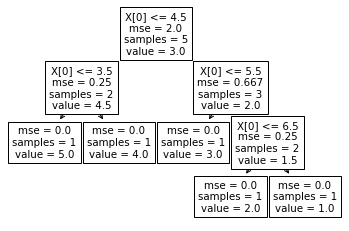

In [64]:
x_train = np.array([[1],[4],[5],[6],[7]])
y_train = np.array([[5],[4],[3],[2],[1]])

x_test = np.array([[8]])
y_test = np.array([[1]])

#training
Regressor = DecisionTreeRegressor(criterion = 'mse', max_depth = 3, random_state = 0).fit(x_train,y_train)

#prediction
y_train_pred, y_test_pred = Regressor.predict(x_train), Regressor.predict(x_test)
print(f'training prediction: {y_train_pred}')
print(f'test prediction: {y_test_pred}')

#evaluation
print(f'train mse is: {mean_squared_error(y_train, y_train_pred)}')
print(f'test mse is: {mean_squared_error(y_test, y_test_pred)}')

tree.plot_tree(Regressor)

Classification tree

training prediction: [5 4 3 2 1]
test prediction: [1]
train accuracy is: 100.0%
test accuracy is: 100.0%


[Text(148.8, 190.26, 'X[0] <= 4.5\nentropy = 2.322\nsamples = 5\nvalue = [1, 1, 1, 1, 1]'),
 Text(74.4, 135.9, 'X[0] <= 3.5\nentropy = 1.0\nsamples = 2\nvalue = [0, 0, 0, 1, 1]'),
 Text(37.2, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0]'),
 Text(223.20000000000002, 135.9, 'X[0] <= 5.5\nentropy = 1.585\nsamples = 3\nvalue = [1, 1, 1, 0, 0]'),
 Text(186.0, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(260.40000000000003, 81.53999999999999, 'X[0] <= 6.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0, 0, 0]'),
 Text(223.20000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(297.6, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]')]

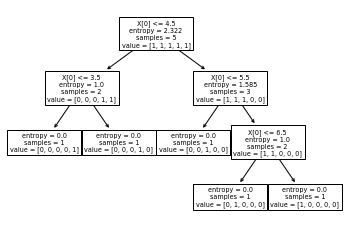

In [65]:
x_train = np.array([[3],[4],[5],[6],[7]])
y_train = np.array([[5],[4],[3],[2],[1]])

x_test = np.array([[8]])
y_test = np.array([[1]])

#training
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0).fit(x_train,y_train)

#prediction
y_train_pred, y_test_pred = classifier.predict(x_train), classifier.predict(x_test)
print(f'training prediction: {y_train_pred}')
print(f'test prediction: {y_test_pred}')

#evaluation
y_pred = classifier.predict(x_test)

print(f'train accuracy is: {accuracy_score(y_train, y_train_pred)*100}%')
print(f'test accuracy is: {accuracy_score(y_test, y_pred)*100}%')

tree.plot_tree(classifier)

# k-means clustering

In [205]:
def k_means(features, k, initialisation_method):
    #initialisation and calcultating initial means
    if initialisation_method == 'random':
        #assign random cluster to each observation
        labels = [rd.randint(0,k-1) for i in range(len(features))]
        means = [66],[82]#find_means(features, labels,k)
        
    if initialisation_method == 'forgy':
        #randomly choosing k data points to be labelled as means
        sample = rd.sample([i for i in range(len(features))], k)
        means = [features[idx] for idx in sample]
        labels = find_labels(features, means) 
    
    #loop
    changing, count = True, 0
    while changing and count < 2:
        labels = find_labels(features, means)
        means = find_means(features, labels,k)
        count += 1
        #print(f'i am trying... iteration:{count}')
    return means, labels, features
        
def find_labels(features, means): #returns new labels, given newly calculated means
    labels = [None for label in range(len(features))]
    
    for datum in range(len(features)): #for each datum, calculate distances to each mean, find minimum and then put to label
        k_distances = np.array([eucl_dist(features[datum], means[k]) for k in range(len(means))])
        labels[datum] = np.argmin(k_distances)
    return labels
    
def find_means(features, labels,k): #returns new means, given newly calculated labels
    #split data by label
    df = pd.DataFrame (zip(features, labels))
    means = []
    for cluster in range(k):
        cluster_features = df[df.iloc[:,1] == cluster][0].values.tolist()
        ck = np.sum([np.array(v) for v in cluster_features], axis = 0)/len(cluster_features)
        means.append(ck)
        #if np.any(np.isnan(ck)):
            #print('Nan - no kth center')
    return means

def eucl_dist(a,b):
    return np.linalg.norm(a-b)



In [206]:
k = 2
features = np.array([[50],[60],[66],[70],[72],[76],[82],[90],[98]])
Y = np.array([[1,2],[3,4]])

mean_list, label_list = [],[]
#finding means
for i in range(10):
    means, labels, features = k_means(features, k, 'random')
    mean_list.append(means)
    label_list.append(labels)



print(f'means are: {means}')
#print(f'mse list is: {mse_list}')

#evaluation of k if labelled data
#print(f'accuracy score is: {accuracy_score(Y, labels)}')
#print(f'mse is: {mean_squared_error(Y, labels)}')

means are: [array([63.6]), array([86.5])]
mse list is: [4.0, 2.0]


In [241]:
label_list

[[0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1]]

In [244]:
values = [9,11,23,6,8,12,10,4,13,7]
val = np.array([9,11,23,6,8,12,10,4,13,7])
bias = 0

for i in values:
    bias += ((i - np.mean(val))**2)/len(values)
    
#bias

#np.mean(val)
#np.var(val)
bias

24.810000000000002

In [249]:
values = [6,8,9,5,10,5,4,8,9,3]
val = np.array([6,8,9,5,10,5,4,8,9,3])
var, error = 0,0

for i in values:
    var += ((i - np.mean(val))**2)/len(values)
    
for i in values:
    error += ((i - 7)**2)/len(values)

var
#np.mean(val)
#np.var(val)
#error

5.210000000000001

In [195]:
#plotting
df = pd.DataFrame (zip(features, labels))

fig = plt.figure()
ax = fig.add_subplot()
col = ['b','r','g', 'c','m']
for i in range(k):
    try:
        cluster = df[df.iloc[:,1] == i][0].values.tolist()
        x, y = zip(*cluster)
        ax.scatter(x,y,c = col[i])
    except:
        continue

x = [means[j][0] for j in range(len(means))]
y = [means[h][1] for h in range(len(means))]
plt.scatter(x,y, marker = 'X', s= 500, color = 'black')

plt.show()

#evaluation of k
mse_list = []
for i in range(len(means)):
    mse_list.append(np.sum((features[np.where(np.array(labels) == i)] - means[i])**2))

[array([63.6]), array([86.5])]

# Neural network classifier

In [68]:
from sklearn.neural_network import MLPClassifier

def NNClassifier(x_train,y_train,x_test,y_test,sizes):
    #training
    clf = MLPClassifier(solver = 'lbfgs', alpha = 1e-3, hidden_layer_sizes=sizes)
    clf.fit(x_train, y_train)
    
    #prediction
    y_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)
    
    #evaluation
    test_accuracy = accuracy_score(y_test,y_pred)
    train_accuracy = accuracy_score(y_train,y_train_pred)
    
    print(f'test accuracy is: f{test_accuracy}')
    print(f'train accuracy is: f{train_accuracy}')

    return y_pred, y_train_pred

In [69]:
x_train = np.array([[3],[4],[5],[6],[7]])
y_train = np.array([[5],[4],[3],[2],[1]])

x_test = np.array([[8]])
y_test = np.array([[1]])

sizes = (3,4,3)

NNClassifier(x_train,y_train,x_test,y_test,sizes)

C:\Users\tanna\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


test accuracy is: f1.0
train accuracy is: f0.8


C:\Users\tanna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


(array([1]), array([4, 4, 3, 2, 1]))

Forward propagation

In [ ]:
#exponential function
def exp_fn(x,y,w):
    return np.exp(-x@w)

#sigmoid function
def sigmoid(x,y,w):
    return np.array(1/(1+np.exp(-x@w)))

#ReLu function
def relu(x,y,w):
    return np.array(np.maximum(x@w, 0))


In [ ]:
X = np.array([[1,1],[1,1]])
Y = np.array([[1],[1]])
w = np.array([[1],[1]])

z = X@w
activation = exp_fn(X,Y,w)

print('z is:')
print(z)
print('activation is:')
print(activation)

# Reading data

In [ ]:
#loading data
data = load_iris()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataX, dataY = train_test_split(data['data'],test_size = 0.20, train_size = 0.80, random_state = 0), train_test_split(data['target'],test_size = 0.20, train_size = 0.80, random_state = 0)
X_train, X_test, y_train, y_test = dataX[0], dataX[1], dataY[0], dataY[1]

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

mat = np.array([[1,2],[3.5,6],[3,6]])

#Z-score
zscaled = StandardScaler()
zscaled.fit(mat)
print(f"The Scaling mean is: \n{zscaled.mean_}\n The z-scaled data is:\n {zscaled.transform(mat)}\n ")

#Min-Max Scaling
minmaxscaled = MinMaxScaler()
minmaxscaled.fit(mat)
print(f"The min-max scaled data is:\n {minmaxscaled.transform(mat)}\n ")


# Cross validation

In [ ]:
def kFolds(n_splits, shuffled, data):
    kf = KFold(n_splits = n_splits, shuffle = shuffled)
    X, Y = data['data'], data['target']
    trainX, testX, trainY, testY = [], [], [], []
    for train_index, test_index in kf.split(X):
        trainX.append(X[train_index])
        testX.append(X[test_index])
        trainY.append(Y[train_index])
        testY.append(Y[test_index])
    
    return trainX, testX, trainY, testY


def kFolds_test(n_splits, shuffled, data, TestSize, RandomState):
    dataX = train_test_split(data['data'],test_size = TestSize, train_size = (1-TestSize), random_state = RandomState)
    dataY = train_test_split(data['target'],test_size = TestSize, train_size = (1-TestSize), random_state = RandomState)
    X, testX, Y, testY = dataX[0], dataX[1], dataY[0], dataY[1]
    del dataX, dataY
    
    kf = KFold(n_splits = n_splits, shuffle = shuffled)
    trainX, valX, trainY, valY = [], [], [], []
    for train_index, test_index in kf.split(X):
        trainX.append(X[train_index])
        valX.append(X[test_index])
        trainY.append(Y[train_index])
        valY.append(Y[test_index])
    return trainX, valX, testX, trainY, valY, testY